# Section 0: Import Packages

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import pandas as pd
import re
import jieba
import string
import collections
import chardet
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Section 1: Read Data & Data Cleaning

In [2]:
hiphop = pd.read_csv("../01_WebScraping/hiphop.csv")

In [3]:
hiphop.head()

,singer,episode,lyrics,title
0,Bigdog大狗,中国有嘻哈 第1期,这个世上本没有路;走的人多了也就成了路;经过那些迷雾;穿过前人栽下的树;于是进入 认输 愤怒...,大狗(海选作品)
1,辉子,中国有嘻哈 第7期,制作人和战队选手带着Beat离开 ;充满期待 ;U盘里储存未知的节拍;魔鬼剪辑黑屏的秘密 ;...,中国有嘻哈 EP07 RAP02
2,鬼卞,中国有嘻哈 第3期,我的背影如飞掀起了大雾;背后记下一击毙命的tattoo;百年屈辱的故事等我插足;悄无声息没有...,侠客
3,吴亦凡战队,中国有嘻哈 第7期,演唱：HipHopMan欧阳靖&PG One&万磁王&BrAnT.B小白&TT OBi&M0...,How Do
4,潘玮柏战队,中国有嘻哈 第7期,从过去到现在;从现在到未来;Let’s get it;这首歌我们要献给;从海选;到现在的全国...,700


## Clean lyrics
去掉歌词中的
   1. 演唱：
   2. 词：
   3. 曲：
   4. 编曲：
   5. 定位制作人：
   6. 音乐总监：

In [4]:
def strip_info(lyrics):
    sentences = lyrics.split(";")
    return ";".join([sentence for sentence in sentences if re.search(u'\xef\xbc\x9a', sentence) is None])

In [5]:
hiphop['cleaned_lyrics'] = hiphop['lyrics'].apply(lambda x: strip_info(x))

In [6]:
hiphop.head()

,singer,episode,lyrics,title,cleaned_lyrics
0,Bigdog大狗,中国有嘻哈 第1期,这个世上本没有路;走的人多了也就成了路;经过那些迷雾;穿过前人栽下的树;于是进入 认输 愤怒...,大狗(海选作品),这个世上本没有路;走的人多了也就成了路;经过那些迷雾;穿过前人栽下的树;于是进入 认输 愤怒...
1,辉子,中国有嘻哈 第7期,制作人和战队选手带着Beat离开 ;充满期待 ;U盘里储存未知的节拍;魔鬼剪辑黑屏的秘密 ;...,中国有嘻哈 EP07 RAP02,制作人和战队选手带着Beat离开 ;充满期待 ;U盘里储存未知的节拍;魔鬼剪辑黑屏的秘密 ;...
2,鬼卞,中国有嘻哈 第3期,我的背影如飞掀起了大雾;背后记下一击毙命的tattoo;百年屈辱的故事等我插足;悄无声息没有...,侠客,我的背影如飞掀起了大雾;背后记下一击毙命的tattoo;百年屈辱的故事等我插足;悄无声息没有...
3,吴亦凡战队,中国有嘻哈 第7期,演唱：HipHopMan欧阳靖&PG One&万磁王&BrAnT.B小白&TT OBi&M0...,How Do,Put your hands up;Put your hands up;Put your h...
4,潘玮柏战队,中国有嘻哈 第7期,从过去到现在;从现在到未来;Let’s get it;这首歌我们要献给;从海选;到现在的全国...,700,从过去到现在;从现在到未来;Let’s get it;这首歌我们要献给;从海选;到现在的全国...


## Tokenization 分词

In [7]:
def myTokenizer(lyrics):
    return [token for token in jieba.cut(lyrics) if token not in string.punctuation+" "]

In [8]:
hiphop_byepisode = pd.DataFrame(hiphop.groupby('episode')['cleaned_lyrics'].apply(lambda x: ";".join(x))).reset_index()

In [42]:
hiphop_byepisode

,episode,cleaned_lyrics
0,中国有嘻哈 第10期,嘻哈兄弟离开;开启新的存在;双手插口袋;大摇大摆 不理成败;一直跑一直跑;就像《头文字D》超...
1,中国有嘻哈 第11期,Jump on my way;Jump on my way;Jump on my way;水...
2,中国有嘻哈 第12期,第一赛段画了句号;年度三强加冕王者荣耀;下轮游戏谁会得到毒药;打起精神 别玩闹 别成了玩笑;...
3,中国有嘻哈 第1期,这个世上本没有路;走的人多了也就成了路;经过那些迷雾;穿过前人栽下的树;于是进入 认输 愤怒...
4,中国有嘻哈 第2期,嫉妒太多就像秋叶遍地;我早就已经厌烦了他们的建议;等我变成飓风大楼被掀起;渺小的他们依然看不...
5,中国有嘻哈 第3期,我的背影如飞掀起了大雾;背后记下一击毙命的tattoo;百年屈辱的故事等我插足;悄无声息没有...
6,中国有嘻哈 第4期,这首歌作为约定;今后路我们一起走;不管健康疾病贫穷 生旦净末丑;这首歌作为约定 这首歌作为约...
7,中国有嘻哈 第5期,我是差不多先生 我的差不多是天生;代表我很天真 也代表我是个闲人 ;这差不多的人生 这个问题...
8,中国有嘻哈 第6期,World wide tour yayayaya yaya;看什么6你和我走一波;兄弟义气我...
9,中国有嘻哈 第7期,制作人和战队选手带着Beat离开 ;充满期待 ;U盘里储存未知的节拍;魔鬼剪辑黑屏的秘密 ;...


In [41]:
hiphop_byepisode.iloc[11]['episode'] = '\xe4\xb8\xad\xe5\x9b\xbd\xe6\x9c\x89\xe5\x98\xbb\xe5\x93\x88 \xe7\xac\xac8\xe6\x9c\x9f'

## Frequency Count 统计词频

In [10]:
def freq_count(tokens):
    df = pd.DataFrame.from_dict(dict(collections.Counter(tokens)).items())
    df.columns = ['token', 'frequency']
    df = df.sort_values(by='frequency', ascending=False)
    return df

In [18]:
# Test on Episode 12
freq_count(myTokenizer(hiphop_byepisode.iloc[2]['cleaned_lyrics'])).head()

,token,frequency
66,的,263
1426,我,167
1896,你,117
365,在,82
86,是,80


## Remove stopwords 去除停用词

In [11]:
with open("stopwords.txt", "r") as f:
    chinese_stopwords = f.read()

In [13]:
chardet.detect(chinese_stopwords)

{'confidence': 0.99, 'encoding': 'GB2312', 'language': 'Chinese'}

In [12]:
clean_stopwords = []
for word in chinese_stopwords.split('\n'):
    try:
        clean_stopwords.append(word.decode('GB2312').encode('utf8').strip())
    except UnicodeDecodeError:
        pass

In [13]:
len(clean_stopwords)

1205

## Re-count 去除停用词后重新统计

In [14]:
def remove_stopwords(lyrics):
    tokens = [x.lower() for x in myTokenizer(lyrics)]
    return [x for x in tokens if x.encode('utf-8') not in clean_stopwords and x not in stopwords.words('english')]

In [33]:
# Test on Episode 12
freq_count(remove_stopwords(hiphop_byepisode.iloc[2]['cleaned_lyrics'])).head()

,token,frequency
649,thinking,36
1018,人,28
627,说,26
331,feel,25
1175,one,25


In [34]:
test = freq_count(remove_stopwords(hiphop_byepisode.iloc[2]['cleaned_lyrics']))

In [40]:
test = test.loc[test['frequency'] <= 10]

## Word Cloud 词云图

In [15]:
def plot_word_cloud(freq_count_df, file_name):
    wc = WordCloud(font_path="/Library/Fonts/STFangSong.ttf", background_color="white")
    wc = wc.fit_words(freq_count_df.head(500).itertuples(index=False))
    plt.figure(figsize=(9.6,8))
    plt.tick_params(
        axis='both',       # changes apply to x and y axes
        which='both',      # both major and minor ticks are affected
        labelbottom='off',
        labeltop='off',
        labelleft='off',
        labelright='off'
    )
    plt.imshow(wc)
    plt.savefig(file_name)

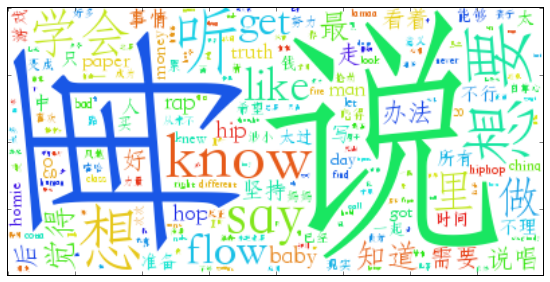

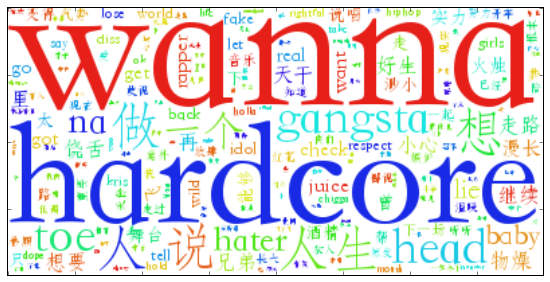

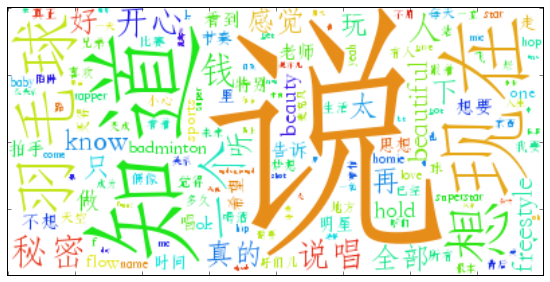

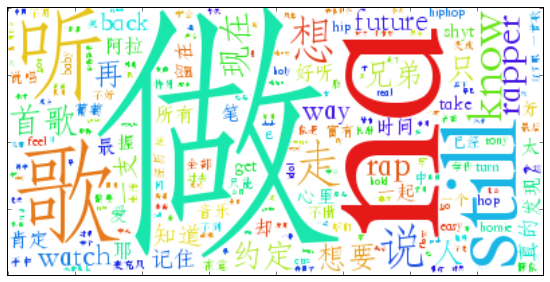

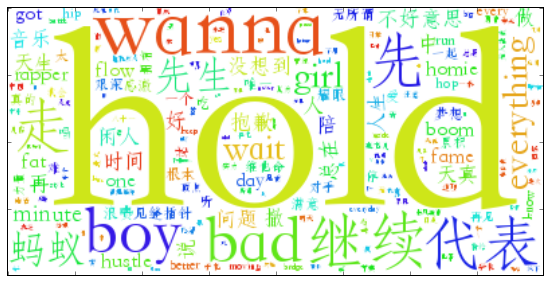

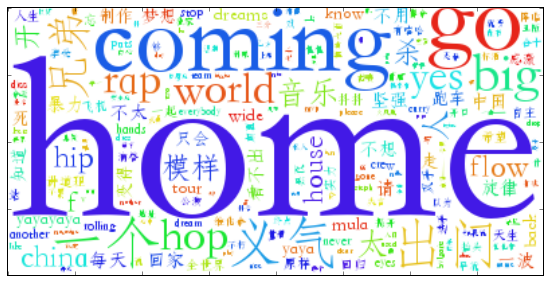

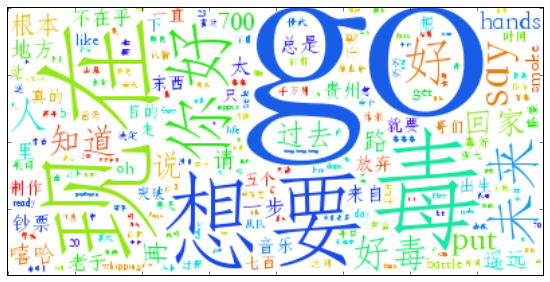

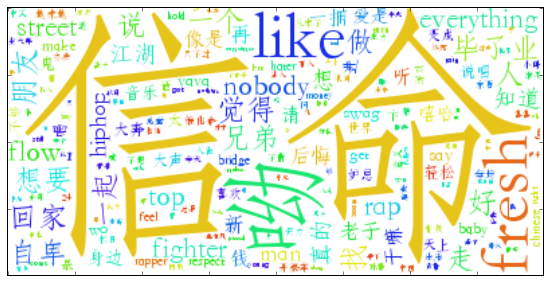

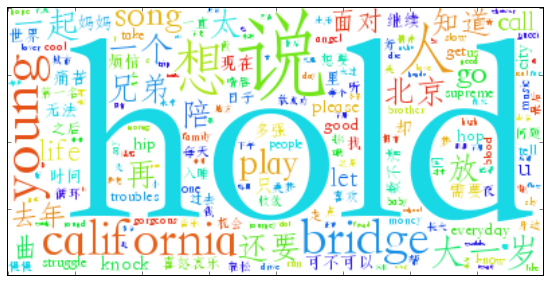

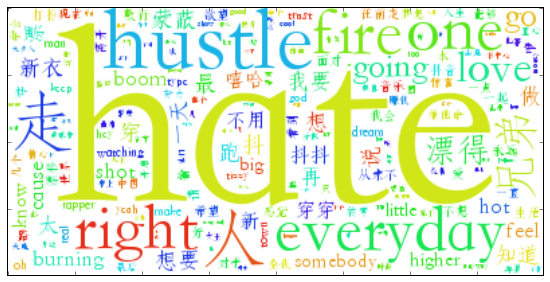

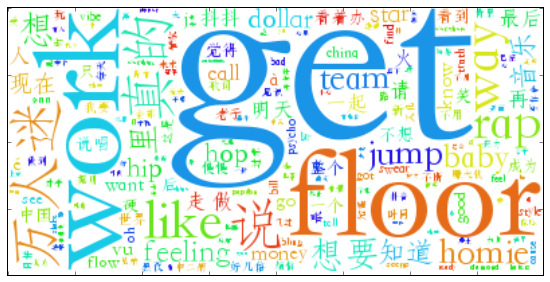

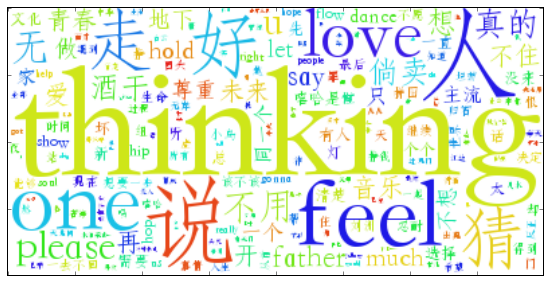

In [55]:
for i in range(1, 13):
    freq_count_df = freq_count(remove_stopwords(hiphop_byepisode.loc[hiphop_byepisode['episode'] == 
                                                                     '\xe4\xb8\xad\xe5\x9b\xbd\xe6\x9c\x89\xe5\x98\xbb\xe5\x93\x88 \xe7\xac\xac' + str(i) + '\xe6\x9c\x9f']['cleaned_lyrics'].tolist()[0]))
    plot_word_cloud(freq_count_df, "Plots/Episode " + str(i) + " Word Cloud.png")